In this notebook, we will plot the results of the experiments comparing the alternative
models using Thompson sampling.

In [1]:
import json
import os

import torch
from torch import Tensor

%matplotlib inline
import matplotlib.pyplot as plt

# current_dir = os.path.dirname(os.path.abspath(__file__))
current_dir = os.getcwd()

labels = ["LCEGP", "moment-matching", "KL", "moment-KL"]
label_count = len(labels)


def plot_experiment(dirname: str, plot_idcs: list = None) -> Tensor:
    exp_dir = os.path.join(current_dir, dirname)
    config_path = os.path.join(exp_dir, "config.json")

    with open(config_path, "r") as f:
        config_dict = json.load(f)
        print(f"Config: \n {json.dumps(config_dict, indent=4)}")

    # get all the output files
    directory_list = os.listdir(exp_dir)
    output_files = [
        os.path.join(exp_dir, file) for file in directory_list if file[-3:] == ".pt"
    ]

    # read all outputs into a list
    output_dicts = list()
    for file_path in output_files:
        output_dicts.append(torch.load(file_path))
    output_count = len(output_dicts)
    print(f"Read {output_count} output files.")

    # plot final values, averaged over replications.
    # final values is a list of tensors, one tensor per label
    key = "final_values"
    final_value_shape = output_dicts[0][key][0].shape
    all_results = torch.zeros(label_count, output_count, *final_value_shape)

    for j, out_dict in enumerate(output_dicts):
        for i in range(label_count):
            all_results[i, j] = out_dict[key][i].cpu()

    # average to get the plot values
    plot_values = all_results.mean(dim=1)

    # plot
    fig = plt.figure(figsize=(12, 8))
    fig.patch.set_facecolor('xkcd:mint green')
    if plot_idcs is None:
        plot_idcs = list(range(label_count))

    for i in plot_idcs:
        plt.plot(plot_values[i], label=labels[i])
    plt.grid()
    plt.legend()
    plt.show()
    return all_results


Config: 
 {
    "num_alternatives": 5,
    "rho": 0.5,
    "num_full_train": 3,
    "iterations": 100,
    "fit_frequency": 5,
    "fit_tries": 1,
    "q": 5
}
Read 29 output files.


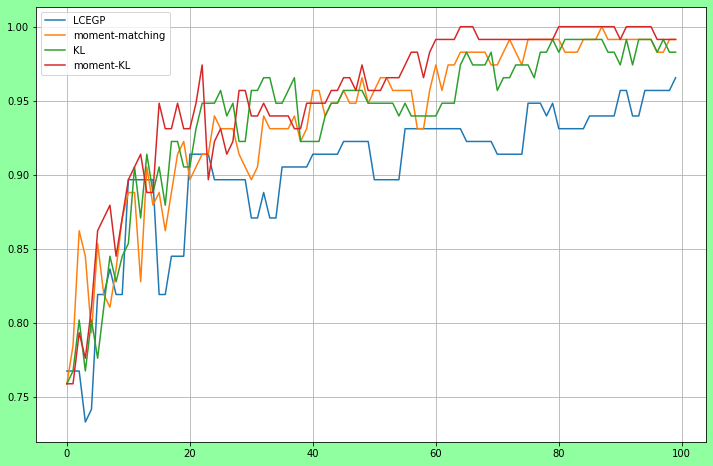

In [2]:
_ = plot_experiment("config_1")

Config: 
 {
    "num_alternatives": 5,
    "rho": 0.5,
    "num_full_train": 3,
    "iterations": 200,
    "fit_frequency": 5,
    "fit_tries": 1,
    "q": 1
}
Read 30 output files.


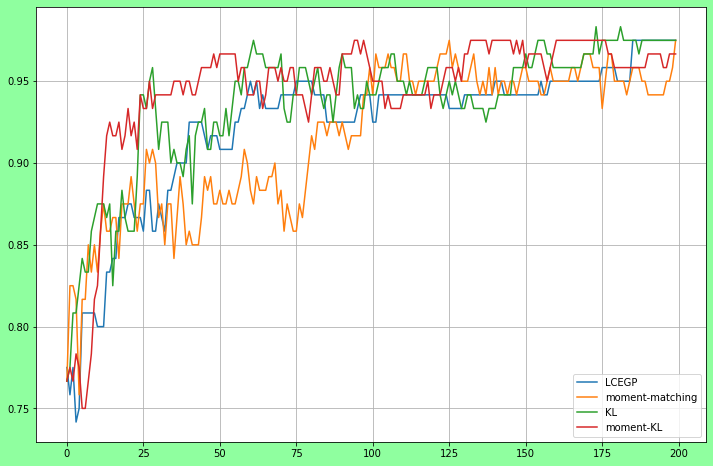

In [3]:
_ = plot_experiment("config_2")

Config: 
 {
    "num_alternatives": 10,
    "rho": 0.3,
    "num_full_train": 3,
    "iterations": 200,
    "fit_frequency": 5,
    "fit_tries": 1,
    "q": 1
}
Read 30 output files.


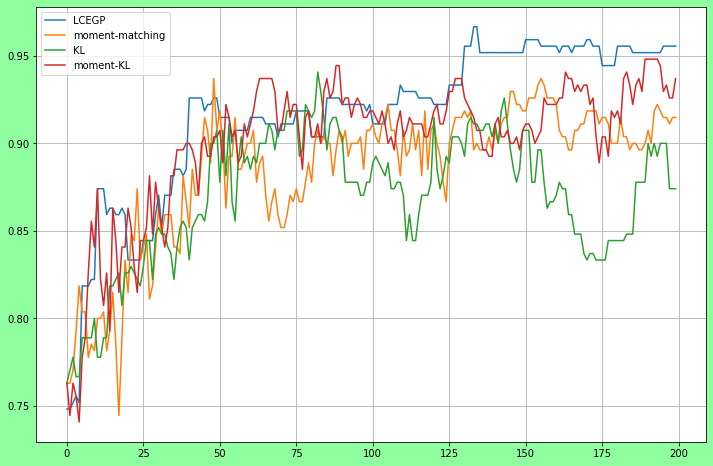

In [4]:
_ = plot_experiment("config_3")

Config: 
 {
    "num_alternatives": 20,
    "rho": 0.7,
    "num_full_train": 3,
    "iterations": 200,
    "fit_frequency": 5,
    "fit_tries": 1,
    "q": 1
}
Read 30 output files.


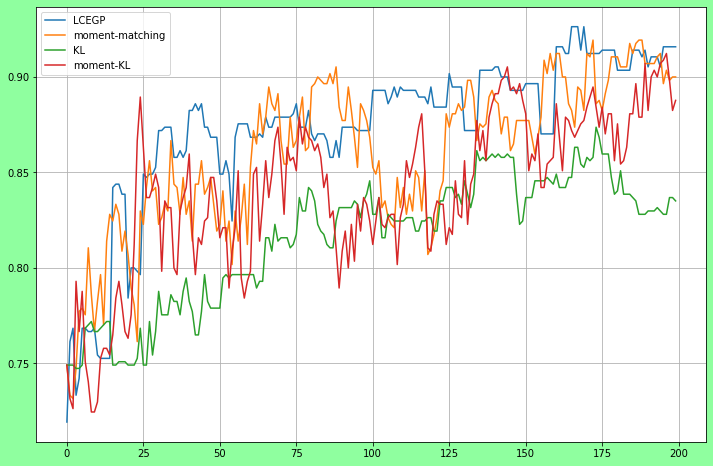

In [5]:
_ = plot_experiment("config_4")


Let's also take a closer look at LCEGP by plotting replication by replication.

Config: 
 {
    "num_alternatives": 5,
    "rho": 0.5,
    "num_full_train": 3,
    "iterations": 200,
    "fit_frequency": 5,
    "fit_tries": 1,
    "q": 1
}
Read 30 output files.


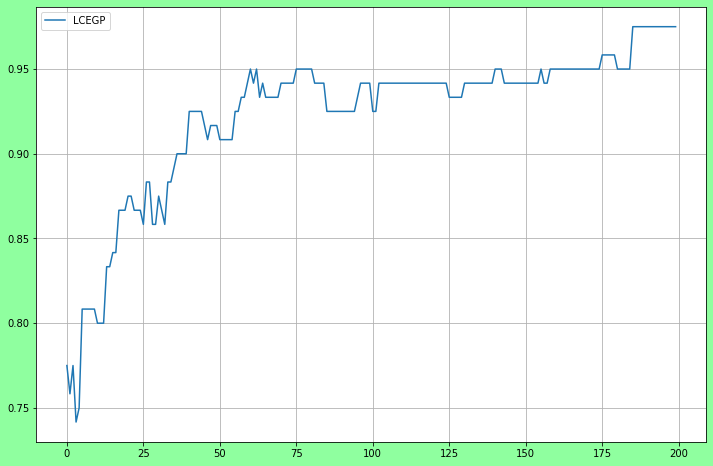

In [6]:
all_results = plot_experiment("config_2", [0,])

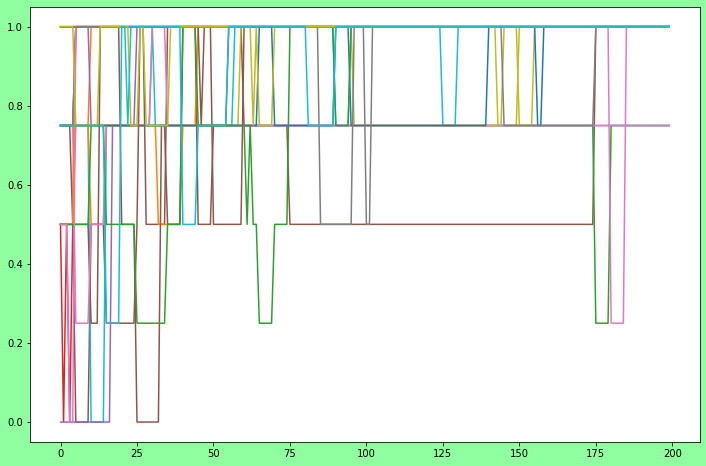

In [7]:
# plot 0th setting
fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('xkcd:mint green')

for i in range(all_results.shape[1]):
    plt.plot(all_results[0, i])
plt.show()

In [8]:
means = all_results.mean(dim=1)
stds = all_results.std(dim=1)

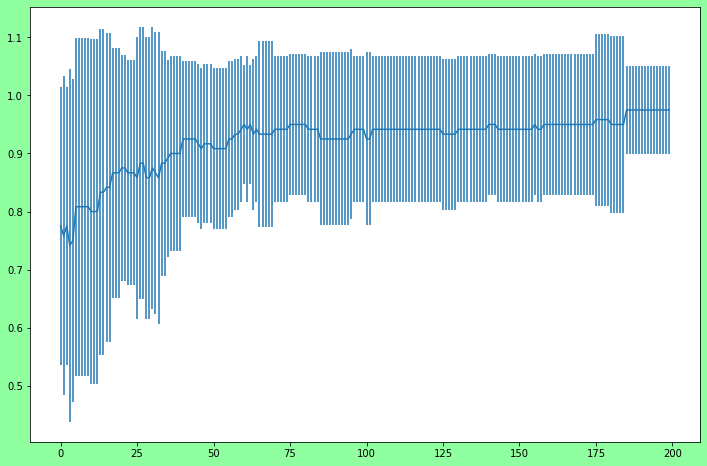

In [9]:
# plot 0th setting
fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('xkcd:mint green')

plt.errorbar(torch.arange(200), means[0], stds[0])
plt.show()


Moment-matching for comparison

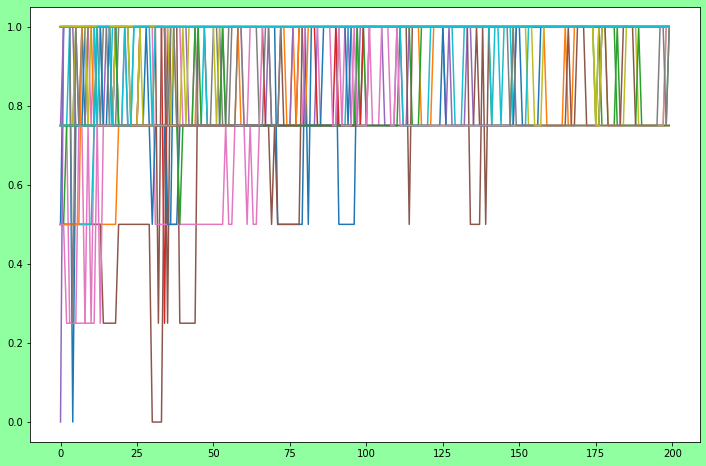

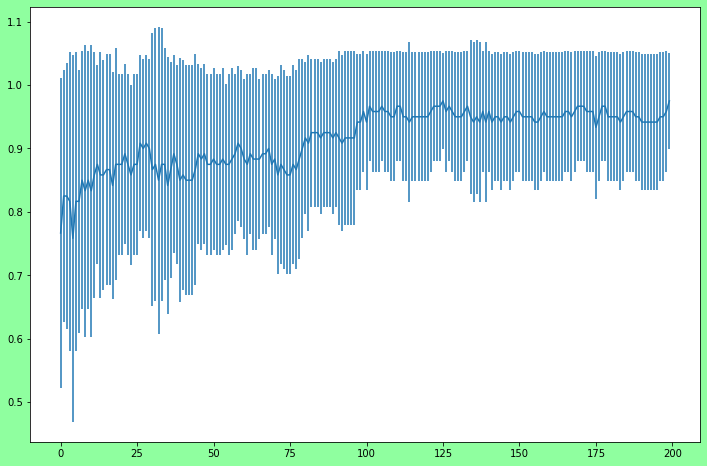

In [10]:
# plot 1st setting
fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('xkcd:mint green')

for i in range(all_results.shape[1]):
    plt.plot(all_results[1, i])
plt.show()

# plot 1st setting
fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('xkcd:mint green')

plt.errorbar(torch.arange(200), means[1], stds[1])
plt.show()

Let's check the averages of means and standard deviations across all iterations.

In [11]:
print(f"Average means: {means.mean(dim=-1)}")
print(f"Average stds: {stds.mean(dim=-1)}")


Average means: tensor([0.9227, 0.9161, 0.9370, 0.9445])
Average stds: tensor([0.1486, 0.1285, 0.1296, 0.1109])


Let's do the same with 4th configuration.

Config: 
 {
    "num_alternatives": 20,
    "rho": 0.7,
    "num_full_train": 3,
    "iterations": 200,
    "fit_frequency": 5,
    "fit_tries": 1,
    "q": 1
}
Read 30 output files.


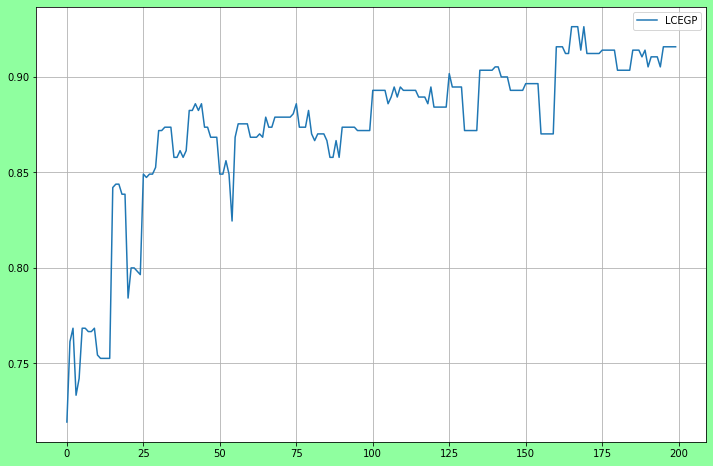

In [12]:
all_results = plot_experiment("config_4", [0,])

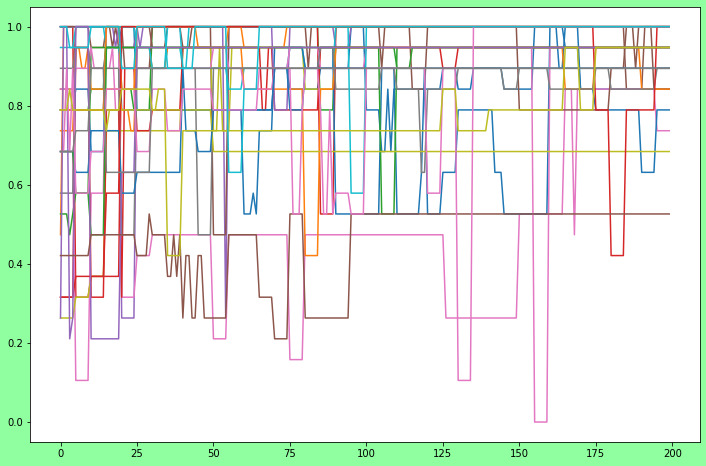

In [13]:
# plot 0th setting
fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('xkcd:mint green')

for i in range(all_results.shape[1]):
    plt.plot(all_results[0, i])
plt.show()

In [14]:
means = all_results.mean(dim=1)
stds = all_results.std(dim=1)

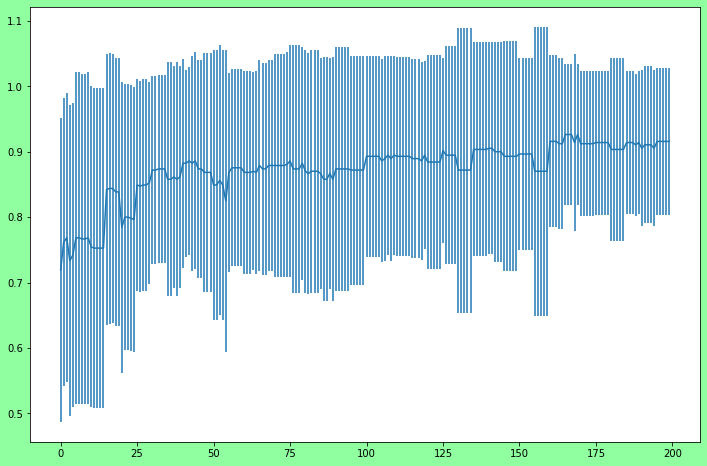

In [15]:
# plot 0th setting
fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('xkcd:mint green')

plt.errorbar(torch.arange(200), means[0], stds[0])
plt.show()


Moment-matching for comparison

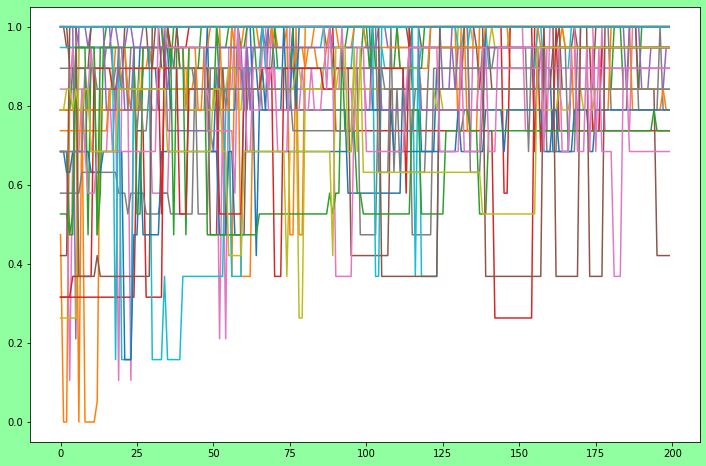

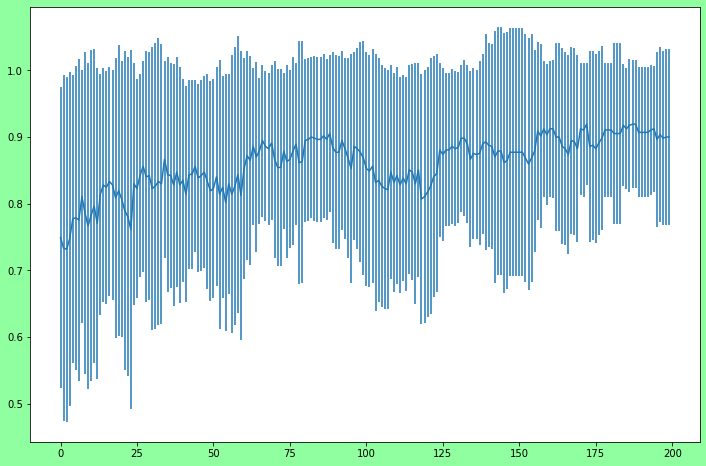

In [16]:
# plot 1st setting
fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('xkcd:mint green')

for i in range(all_results.shape[1]):
    plt.plot(all_results[1, i])
plt.show()

# plot 1st setting
fig = plt.figure(figsize=(12, 8))
fig.patch.set_facecolor('xkcd:mint green')

plt.errorbar(torch.arange(200), means[1], stds[1])
plt.show()

Let's check the averages of means and standard deviations across all iterations.

In [17]:

print(f"Average means: {means.mean(dim=-1)}")
print(f"Average stds: {stds.mean(dim=-1)}")



Average means: tensor([0.8732, 0.8599, 0.8157, 0.8406])
Average stds: tensor([0.1672, 0.1573, 0.1856, 0.1856])
